## Hough transform


<font size = "4" color="blue">https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_houghlines/py_houghlines.html</font>

<font size="3">In image processing, Hough transform is a feature extraction technique that aims to find instances of objects of a certain shape using a voting procedure carried out in a parameter space. In its simplest form, the classical Hough transform can be used to detect straight lines in an image. We can represent a straight line using polar parameters (ρ, θ), where ρ is the length of the line segment and θ is the angle in between the line and the x axis.<br>
    
To explore (ρ, θ) parameter space, it first creates a 2D-histogram. Then, for each value of ρ and θ, it computes the number of non-zero pixels in the input image that are close to the corresponding line and increments the array at position (ρ, θ) accordingly. Hence, each non-zero pixel can be thought of as voting for potential line candidates. The most probable lines correspond to the parameter values that obtained the highest votes, that is, the local maxima in a 2D histogram. <br>
    
The method can be extended to detect circles (and other curves). A similar voting method can be used to find maximum values in the parameter space of circles. The more parameters a curve has, the more it will be spatially and computationally expensive to use the Hough transform to detect the curve.
</font>

In [1]:
from matplotlib import pylab
from pylab import *
from skimage.draw import circle_perimeter

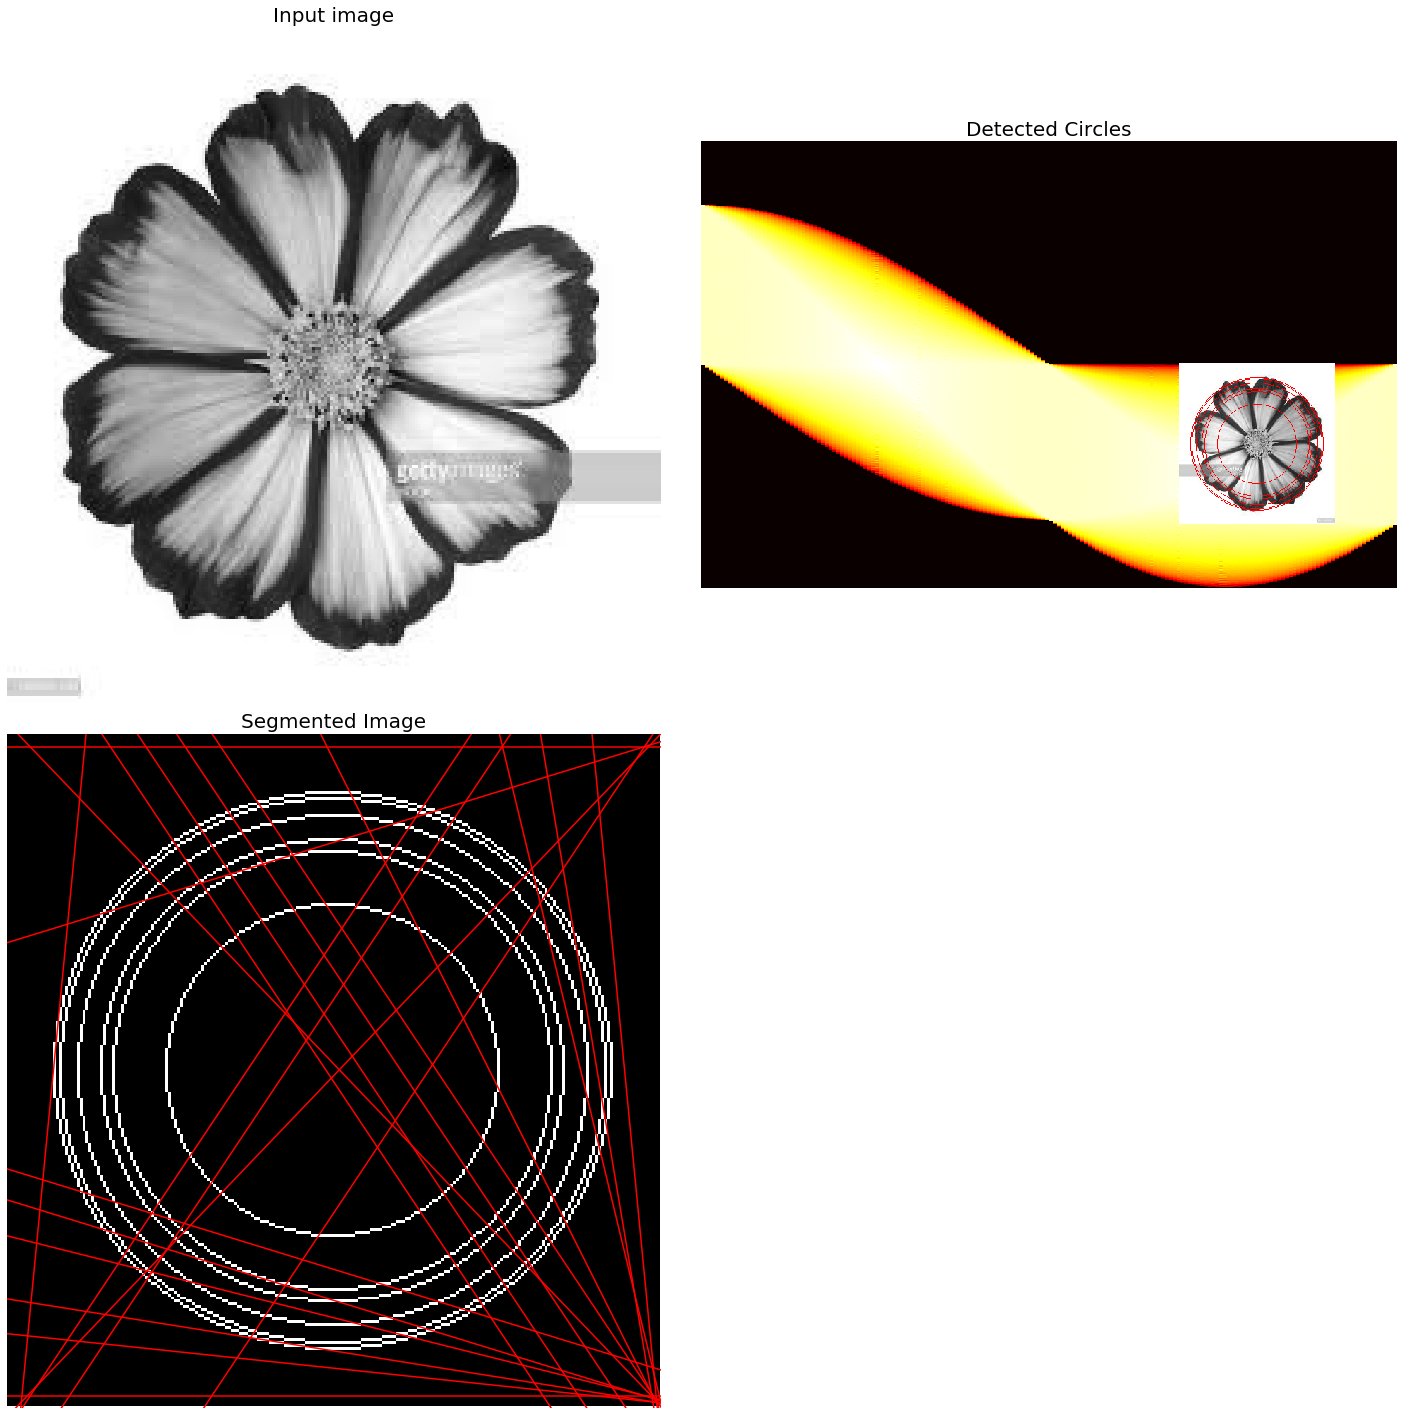

(None, (0.0, 1.0, 0.0, 1.0), None)

In [2]:
import skimage
from skimage.color import rgb2gray,gray2rgb
from skimage.io import imread
from skimage.transform import hough_line,hough_line_peaks,hough_circle,hough_circle_peaks
image = rgb2gray(imread('./images/input/img3.jpg'))
# Classic straight-line Hough transform
h, theta, d = hough_line(image)
fig, axes = pylab.subplots(2, 2, figsize=(20, 20))
axes = axes.ravel()
axes[0].imshow(image, cmap=cm.gray), axes[0].set_title('Input image', size=20), axes[0].set_axis_off()
axes[1].imshow(np.log(1 + h),
 extent=[10*np.rad2deg(theta[-1]), np.rad2deg(theta[0]), d[-1], d[0]],
 cmap=cm.hot, aspect=1/1.5)
axes[1].set_title('Hough transform', size=20)
axes[1].set_xlabel('Angles (degrees)', size=20), axes[1].set_ylabel('Distance (pixels)', size=20)
axes[1].axis('image')
axes[2].imshow(image, cmap=cm.gray)
for _, angle, dist in zip(*hough_line_peaks(h, theta, d)):
    y0 = (dist - 0 * np.cos(angle)) / np.sin(angle)
    y1 = (dist - image.shape[1] * np.cos(angle)) / np.sin(angle)
    axes[2].plot((0, image.shape[1]), (y0, y1), '-r')
axes[2].set_xlim((0, image.shape[1])), axes[2].set_ylim((image.shape[0], 0))
axes[2].set_axis_off(), axes[2].set_title('Detected lines', size=20)

# Circle Hough transform
hough_radii = np.arange(50, 100, 2)
hough_res = hough_circle(image, hough_radii)
# Select the most prominent 6 circles
accums, c_x, c_y, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=6)
segmented_image = np.zeros_like(image)
image = gray2rgb(image)
for center_y, center_x, radius in zip(c_y, c_x, radii):
    circ_y, circ_x = circle_perimeter(center_y, center_x, radius)
    image[circ_y, circ_x] = (1, 0, 0)
    segmented_image[circ_y, circ_x] = 1
axes[1].imshow(image, cmap=pylab.cm.gray), axes[1].set_axis_off()
axes[1].set_title('Detected Circles', size=20)
axes[2].imshow(segmented_image, cmap=pylab.cm.gray), axes[2].set_axis_off()
axes[2].set_title('Segmented Image', size=20)
pylab.tight_layout(), pylab.axis('off'), pylab.show()

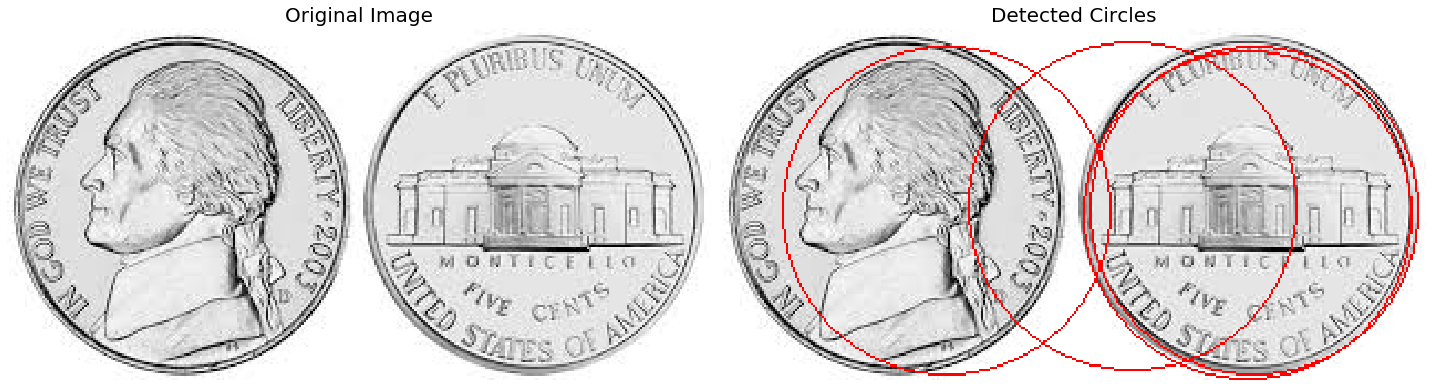

(None, None)

In [3]:
from skimage import color
image = rgb2gray(imread('./images/input/coin.jpg'))
fig, axes = pylab.subplots(1, 2, figsize=(20, 10), sharex=True, sharey=True)
axes = axes.ravel()
axes[0].imshow(image, cmap=pylab.cm.gray), axes[0].set_axis_off()
axes[0].set_title('Original Image', size=20)
hough_radii = np.arange(65, 75, 1)
hough_res = hough_circle(image, hough_radii)
# Select the most prominent 4 circles
accums, c_x, c_y, radii = hough_circle_peaks(hough_res, hough_radii, total_num_peaks=4)
image = color.gray2rgb(image)
for center_y, center_x, radius in zip(c_y, c_x, radii):
    circ_y, circ_x = circle_perimeter(center_y, center_x, radius)
    image[circ_y, circ_x] = (1, 0, 0)
axes[1].imshow(image, cmap=pylab.cm.gray), axes[1].set_axis_off()
axes[1].set_title('Detected Circles', size=20)
pylab.tight_layout(), pylab.show()

In [4]:
import cv2
import numpy as np

img = cv2.imread('./images/input/sudo.png')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)

lines = cv2.HoughLines(edges,1,np.pi/180,200)
for rho,theta in lines[0]:
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a*rho
    y0 = b*rho
    x1 = int(x0 + 1000*(-b))
    y1 = int(y0 + 1000*(a))
    x2 = int(x0 - 1000*(-b))
    y2 = int(y0 - 1000*(a))

    cv2.line(img,(x1,y1),(x2,y2),(0,0,255),2)

cv2.imwrite('./images/output/houghlines3.jpg',img)

True

In [5]:
import cv2
import numpy as np

img = cv2.imread('./images/input/dave.jpg')
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(gray,50,150,apertureSize = 3)
minLineLength = 100
maxLineGap = 10
lines = cv2.HoughLinesP(edges,1,np.pi/180,100,minLineLength,maxLineGap)
for x1,y1,x2,y2 in lines[0]:
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),2)

cv2.imwrite('./images/output/houghlines5.jpg',img)

True

In [6]:
import cv2
import numpy as np

img = cv2.imread('./images/input/img3.jpg',0)
img = cv2.medianBlur(img,5)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,20,
                            param1=50,param2=30,minRadius=0,maxRadius=0)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

cv2.imshow('detected circles',cimg)
cv2.waitKey(0)
cv2.destroyAllWindows()